In [8]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from components.cnn_parallell import experiment6, experiment7
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

In [9]:
plt.rcParams["figure.figsize"] = (6,4)
N = 10000

In [10]:
train_imgs = mnist.train_images()/255.0
train_labels = mnist.train_labels()[:N]
test_imgs = mnist.test_images()/255.0
test_labels = mnist.test_labels()[:N]

data_train = train_imgs[:N, 1:, 1:]
data_test = test_imgs[:N, 1:, 1:]

In [11]:
noises = [.0, .1, .2, .3, .4, .5]
thresholds = [.9, .85, .8, .75,  .7, .65]

noisy_test = [np.array([img + np.random.normal(.0, noise, size=(data_test[0].shape)) for img in data_test]) for noise in noises]
noisy_test_flattened = [data.reshape(-1, 27*27) for data in noisy_test]

train_flattened = data_train.reshape(-1, 27*27)

In [5]:
def black_out_section(image, size):
    offset = 28 - size
    start_row = np.random.randint(3, offset-3)
    start_col = np.random.randint(3, offset-3)
    image_copy = image.copy()
    image_copy[start_row:start_row+size, start_col:start_col+size] = 0
    return image_copy

blackout_sizes = np.arange(0, 18, 3)
blackout_tests = [np.array([black_out_section(img, size) for img in data_test]) for size in blackout_sizes]

In [7]:
threshold_grid_results_lr = {str(noise): {} for noise in noises}

In [7]:
for threshold in thresholds:
    exp_6_train_transformed = experiment6(data_train, threshold=threshold)
    for n_i in range(len(noises)):
        exp_6_test_transformed = experiment6(noisy_test[n_i], threshold=threshold)
        clfs_lr_ex6_ns = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
        clfs_lr_ex6_ns.fit(exp_6_train_transformed, train_labels)
        score = clfs_lr_ex6_ns.score(exp_6_test_transformed, test_labels)
        obtained_list = threshold_grid_results_lr[str(noises[n_i])]
        obtained_list[str(threshold)] = score
        threshold_grid_results_lr[str(noises[n_i])] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

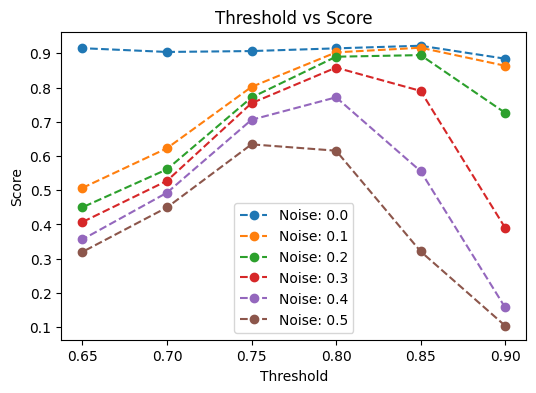

In [8]:
for noise in noises:
    plt.plot(thresholds, [threshold_grid_results_lr[str(noise)][str(threshold)] for threshold in thresholds], label=f'Noise: {noise}', linestyle='--', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()

In [8]:
threshold_grid_results_svm = {str(noise): {} for noise in noises}

In [11]:
for threshold in thresholds:
    exp_6_train_transformed = experiment6(data_train, threshold=threshold)
    for n_i in range(len(noises)):
        exp_6_test_transformed = experiment6(noisy_test[n_i], threshold=threshold)
        clfs_svm_ex6_ns = SVC(kernel='rbf', C=10., gamma="auto")
        clfs_svm_ex6_ns.fit(exp_6_train_transformed, train_labels)
        score = clfs_svm_ex6_ns.score(exp_6_test_transformed, test_labels)
        obtained_list = threshold_grid_results_svm[str(noises[n_i])]
        obtained_list[str(threshold)] = score
        threshold_grid_results_svm[str(noises[n_i])] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

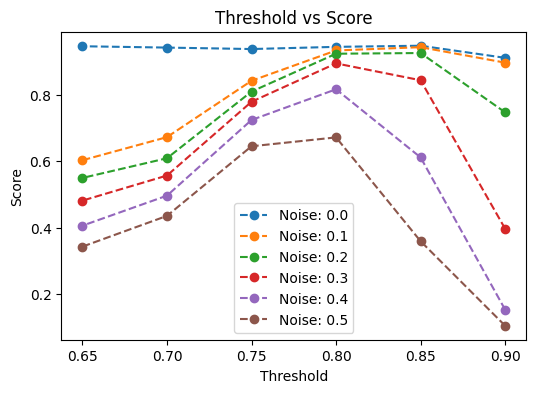

In [12]:
for noise in noises:
    plt.plot(thresholds, 
             [threshold_grid_results_svm[str(noise)][str(threshold)] for threshold in thresholds], 
             label=f'Noise: {noise}', 
             linestyle='--', 
             marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()

In [12]:
threshold_grid_results_knn = {str(noise): {} for noise in noises}

In [13]:
for threshold in thresholds:
    exp_6_train_transformed = experiment6(data_train, threshold=threshold)
    for n_i in range(len(noises)):
        exp_6_test_transformed = experiment6(noisy_test[n_i], threshold=threshold)
        clfs_knn_ex6_ns = KNeighborsClassifier(n_neighbors=5, p=2)
        clfs_knn_ex6_ns.fit(exp_6_train_transformed, train_labels)
        score = clfs_knn_ex6_ns.score(exp_6_test_transformed, test_labels)
        obtained_list = threshold_grid_results_knn[str(noises[n_i])]
        obtained_list[str(threshold)] = score
        threshold_grid_results_knn[str(noises[n_i])] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

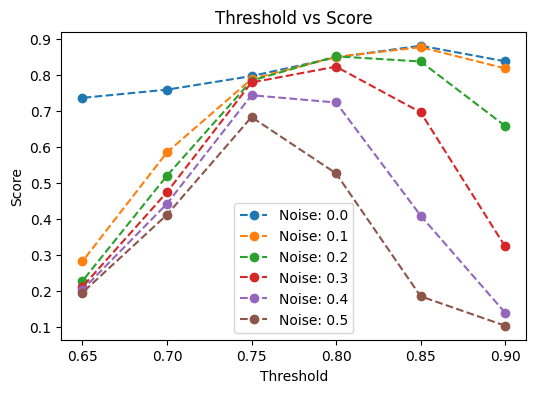

In [14]:
for noise in noises:
    plt.plot(thresholds, 
             [threshold_grid_results_knn[str(noise)][str(threshold)] for threshold in thresholds], 
             label=f'Noise: {noise}', 
             linestyle='--', 
             marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()

In [9]:
threshold_grid_results_blackout = {str(bk): {} for bk in blackout_sizes}

In [16]:
for t in thresholds:
    exp_6_train_transformed = experiment6(data_train, threshold=t)
    for b_i in range(len(blackout_sizes)):
        exp_6_test_transformed = experiment6(blackout_tests[b_i], threshold=t)
        clfs_lr_ex6_bl = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=64,
                                            tol=0.001)
        
        clfs_lr_ex6_bl.fit(exp_6_train_transformed, train_labels)
        score = clfs_lr_ex6_bl.score(exp_6_test_transformed, test_labels)
        obtained_list = threshold_grid_results_blackout[str(blackout_sizes[b_i])]
        obtained_list[str(t)] = score
        threshold_grid_results_blackout[str(blackout_sizes[b_i])] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

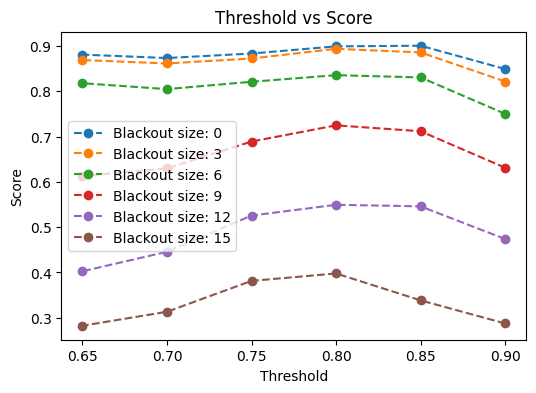

In [17]:
for size in blackout_sizes:
    plt.plot(thresholds, [threshold_grid_results_blackout[str(size)][str(threshold)] for threshold in thresholds], label=f'Blackout size: {size}', linestyle='--', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()

In [12]:
grids_list = [[(1, 1)], 
              [(2, 2), (1, 3)], 
              [(3, 3), (2, 3), (1, 5)], 
              [(3, 3), (2, 5), (1, 7)],
              [(3, 3), (2, 5), (1, 7), (1, 9)]]
         
param_grid_results = {str(grid): {} for grid in grids_list}

In [13]:
for grids in grids_list:
    transformed_exp7 = experiment7(data_train, grids=grids)
    for n_i in range(len(noises)):
        exp_7_test_transformed = experiment7(noisy_test[n_i], grids=grids)
        clfs_lr_ex7 = LogisticRegression(fit_intercept=True,
                                        multi_class='multinomial',
                                        penalty='l2',
                                        solver='saga',
                                        max_iter=1000,
                                        n_jobs=8,
                                        tol=0.001)
        clfs_lr_ex7.fit(transformed_exp7, train_labels)
        score = clfs_lr_ex7.score(exp_7_test_transformed, test_labels)
        obtained_list = param_grid_results[str(grids)]
        obtained_list[str(noises[n_i])] = score
        param_grid_results[str(grids)] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

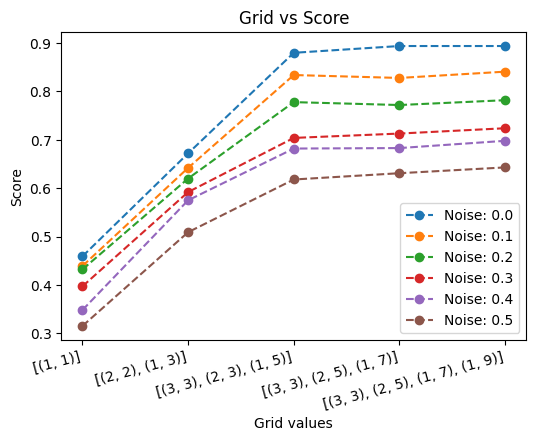

In [32]:
for noise in noises:
    plt.plot([str(g) for g in grids_list], 
             [param_grid_results[str(grids)][str(noise)] for grids in grids_list], 
             label=f'Noise: {noise}', 
             linestyle='--', 
             marker='o')
plt.xlabel('Grid values')
plt.ylabel('Score')
plt.title('Grid vs Score')
plt.xticks(rotation=15, ha='right')
plt.legend()

In [36]:
# same grid search but with blackout

param_grid_results_blackout = {str(grid): {} for grid in grids_list}

for grids in grids_list:
    transformed_exp7 = experiment7(data_train, grids=grids)
    for b_i in range(len(blackout_sizes)):
        exp_7_test_transformed = experiment7(blackout_tests[b_i], grids=grids)

        clfs_lr_ex7 = LogisticRegression(fit_intercept=True,
                                        multi_class='multinomial',
                                        penalty='l2',
                                        solver='saga',
                                        max_iter=1000,
                                        n_jobs=8,
                                        tol=0.001)
        
        clfs_lr_ex7.fit(transformed_exp7, train_labels)
        score = clfs_lr_ex7.score(exp_7_test_transformed, test_labels)
        obtained_list = param_grid_results_blackout[str(grids)]
        obtained_list[str(blackout_sizes[b_i])] = score
        param_grid_results_blackout[str(grids)] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

In [41]:
param_grid_results_blackout

{'[(1, 1)]': {'0': 0.459,
  '3': 0.442,
  '6': 0.393,
  '9': 0.273,
  '12': 0.099,
  '15': 0.085},
 '[(2, 2), (1, 3)]': {'0': 0.672,
  '3': 0.662,
  '6': 0.573,
  '9': 0.388,
  '12': 0.165,
  '15': 0.089},
 '[(3, 3), (2, 3), (1, 5)]': {'0': 0.88,
  '3': 0.873,
  '6': 0.762,
  '9': 0.481,
  '12': 0.238,
  '15': 0.142},
 '[(3, 3), (2, 5), (1, 7)]': {'0': 0.893,
  '3': 0.881,
  '6': 0.781,
  '9': 0.498,
  '12': 0.255,
  '15': 0.146},
 '[(3, 3), (2, 5), (1, 7), (1, 9)]': {'0': 0.895,
  '3': 0.886,
  '6': 0.791,
  '9': 0.503,
  '12': 0.258,
  '15': 0.144}}

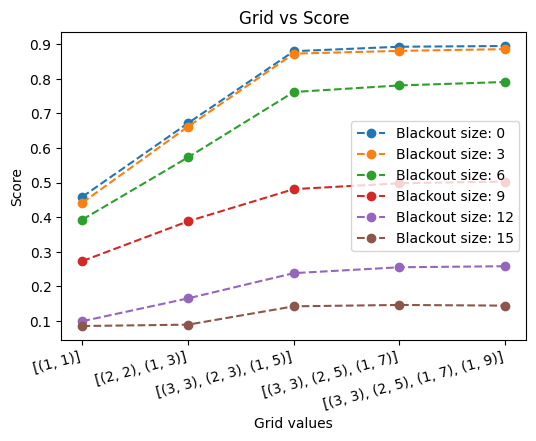

In [48]:
for bk in blackout_sizes:
    plt.plot([str(g) for g in grids_list], [param_grid_results_blackout[str(grids)][str(bk)] for grids in grids_list], label=f'Blackout size: {bk}', linestyle='--', marker='o')
plt.xlabel('Grid values')
plt.ylabel('Score')
plt.title('Grid vs Score')
plt.xticks(rotation=15, ha='right')
plt.legend()

In [6]:
training_examples = [int(N/100), int(N/50), int(N/10), int(N/5), N]
learning_curve_results_noise = {str(noise): {} for noise in noises}

In [7]:
for n in training_examples:
    exp_6_train_transformed = experiment6(data_train[0:n], threshhold=0.8)
    for n_i in range(len(noises)):
        exp_6_test_transformed = experiment6(noisy_test[n_i], threshhold=0.8)
        clfs_lr_ex6_bl = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
        clfs_lr_ex6_bl.fit(exp_6_train_transformed, train_labels[0:n])
        score = clfs_lr_ex6_bl.score(exp_6_test_transformed, test_labels)
        obtained_list = learning_curve_results_noise[str(noises[n_i])]
        obtained_list[str(n)] = score
        learning_curve_results_noise[str(noises[n_i])] = obtained_list

/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
/home/student/master-experiments/components/gaussian.py:17: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) 

In [8]:
learning_curve_results_noise

{'0.0': {'600': 0.8521,
  '1200': 0.8799,
  '6000': 0.911,
  '12000': 0.9171,
  '60000': 0.9316},
 '0.1': {'600': 0.8501,
  '1200': 0.8768,
  '6000': 0.8994,
  '12000': 0.9041,
  '60000': 0.9127},
 '0.2': {'600': 0.8476,
  '1200': 0.868,
  '6000': 0.8878,
  '12000': 0.8927,
  '60000': 0.8995},
 '0.3': {'600': 0.8242,
  '1200': 0.8454,
  '6000': 0.8549,
  '12000': 0.8621,
  '60000': 0.8674},
 '0.4': {'600': 0.7462,
  '1200': 0.7682,
  '6000': 0.7704,
  '12000': 0.7743,
  '60000': 0.7796},
 '0.5': {'600': 0.6198,
  '1200': 0.6453,
  '6000': 0.6246,
  '12000': 0.6211,
  '60000': 0.6279}}

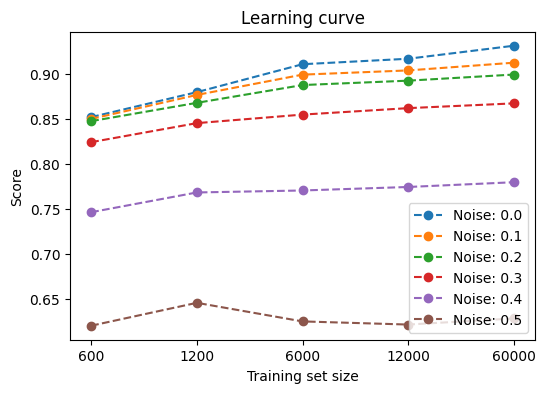

In [9]:
for noise in noises:
    plt.plot([str(t) for t in training_examples], [learning_curve_results_noise[str(noise)][str(n)] for n in training_examples], label=f'Noise: {noise}', linestyle='--', marker='o')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()